# Qualitative evaluation of the ability of the generator and post-hoc encoder pipeline in reconstructing latent samples and audio

This notebook's purpose is to evaluate the ability of the generator and the post-hoc encoder in reconstructing audio. We will do so by i) generating samples from the prior, feeding them through the generator, then feeding them back to the encoder ii) feeding samples from our dataset to the encoder and then the generator of our GAN, ultimately listening to the reconstructed samples and see how they compare to the original audio.

### Import packages

In [1]:
import os
import IPython.display as ipd
os.chdir(os.path.join("/", "home", "c-matsty", "Bi-TiFGAN---TensorFlow-1.14", "src"))

import tensorflow as tf
import numpy as np
import argparse
import matplotlib.pyplot as plt
from tqdm import tqdm

from feature_evaluation.utils import load_data, get_posthoc_encoder_spectrogram_reconstructions, \
     get_posthoc_encoder_latent_reconstructions
from sample_generation.generate import inverse_preprocessing, clip_dist2

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

### Define paths and constants

In [3]:
data_dir = os.path.join("/media", "datastore", "c-matsty-data")

##### Data paths

In [4]:
dataset_dir = os.path.join(data_dir, "datasets", "SpeechCommands")

In [5]:
train_dir = os.path.join(dataset_dir, "SpeechCommands_Preproc_2_training")
train_input_path = os.path.join(train_dir, "input_data")

In [6]:
test_dir = os.path.join(dataset_dir, "SpeechCommands_Preproc_2_test")
test_input_path = os.path.join(test_dir, "input_data")

##### Checkpoint paths and constants needed for loading the tifgan and the post-hoc encoder

In [7]:
encoder_checkpoint_path = os.path.join(data_dir, "checkpoints_summaries", "post_hoc_tifgan_encoder", "commands_md64_8k_checkpoint_step_499000")
tifgan_checkpoint_path = os.path.join(data_dir, "checkpoints_summaries", "tifgan_spectralnorm_sc09")
tifgan_checkpoint_step = 99000
name = "commands_md64_8k"

#### Define constants needed to invert the preprocessing steps

In [8]:
FIXED_AUDIO_LEN = 16384
FFT_HOP_SIZE = 128
FFT_WINDOW_LEN = 512

### Load data

###### Load training data

In [9]:
X_tr = load_data(train_input_path)

  1%|          | 1/165 [00:00<00:31,  5.23it/s]

Loading data


100%|██████████| 165/165 [00:31<00:00,  5.17it/s]


###### Load test data

In [10]:
X_ts = load_data(test_input_path)

  5%|▌         | 1/20 [00:00<00:03,  5.31it/s]

Loading data


100%|██████████| 20/20 [00:03<00:00,  5.17it/s]


#### Select random data from training and test set for reconstruction

In [11]:
sample_no = 20

In [12]:
np.random.seed(0)
selected_set_tr = np.random.choice(len(X_tr), replace=False, size=sample_no)
X_tr = X_tr[selected_set_tr]

In [13]:
np.random.seed(0)
selected_set_ts = np.random.choice(len(X_ts), replace=False, size=sample_no)
X_ts = X_ts[selected_set_ts]

### Reconstruct training dataset samples

In [14]:
X_tr_recon = get_posthoc_encoder_spectrogram_reconstructions(X_tr, tifgan_checkpoint_path, 
                                                             tifgan_checkpoint_step,
                                                             encoder_checkpoint_path, name)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use `tf.cast` instead.



Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/post_hoc_tifgan_encoder/commands_md64_8k_checkpoint_step_499000
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/tifgan_spectralnorm_sc09/commands_md64_8k_checkpoints/wgan-99000


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/post_hoc_tifgan_encoder/commands_md64_8k_checkpoint_step_499000
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/tifgan_spectralnorm_sc09/commands_md64_8k_checkpoints/wgan-99000
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/post_hoc_tifgan_encoder/commands_md64_8k_checkpoint_step_499000
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/tifgan_spectralnorm_sc09/commands_md64_8k_checkpoints/wgan-99000
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/post_hoc_tifgan_encoder/commands_md64_8k_checkpoint_step_499000
INFO:tensorflow:Restoring parameters from /media/datastore/c-matsty-data/checkpoints_summaries/tifgan_spectralnorm_sc09/commands_md64_8k_checkpoints/wgan-99000


### Reconstruct test dataset samples

In [15]:
X_ts_recon = get_posthoc_encoder_spectrogram_reconstructions(X_ts, tifgan_checkpoint_path, 
                                                             tifgan_checkpoint_step,
                                                             encoder_checkpoint_path, name)

100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


### Plot reconstructed training set spectrograms

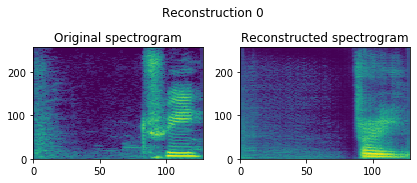

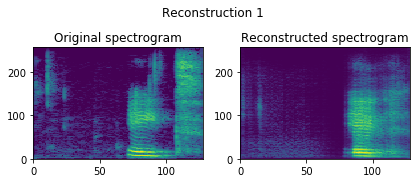

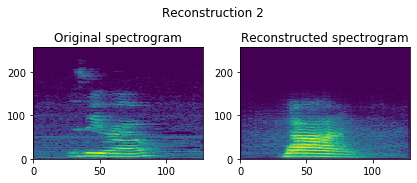

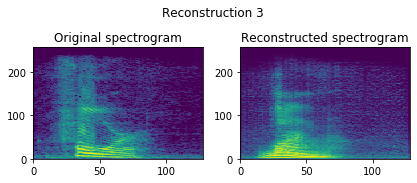

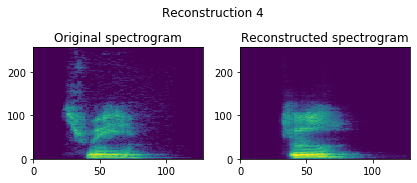

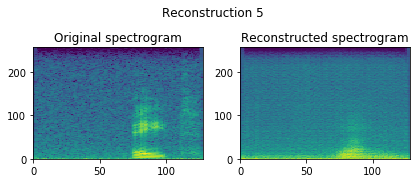

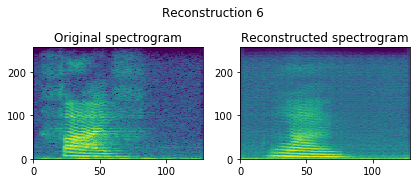

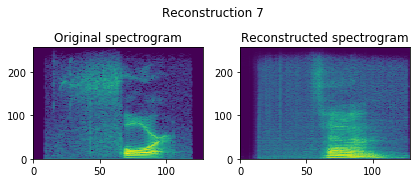

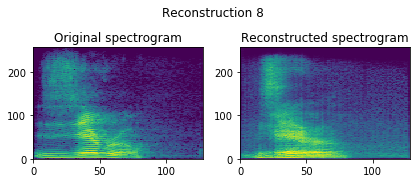

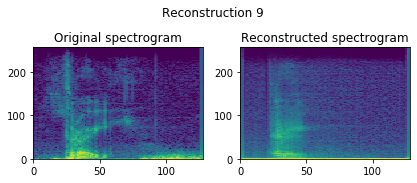

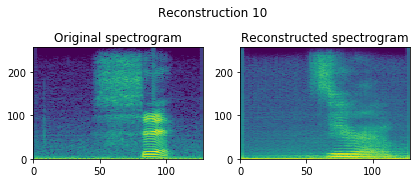

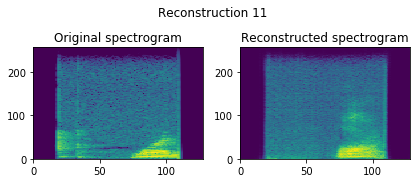

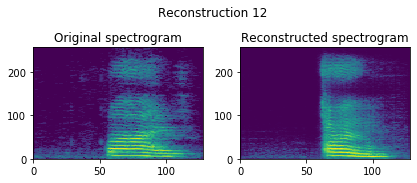

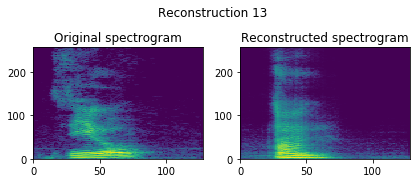

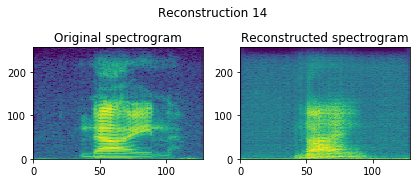

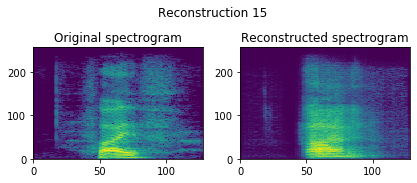

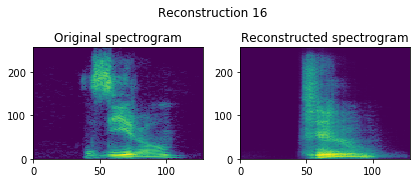

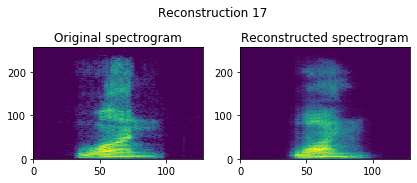

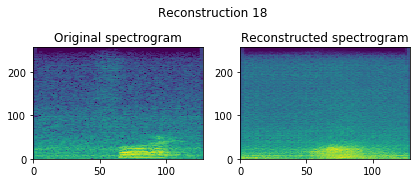

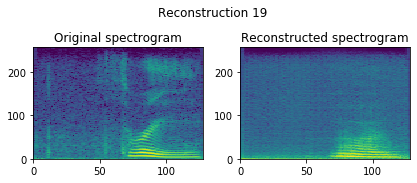

In [16]:
for i in range(len(X_tr)):
    x = X_tr[i][:, :, 0]
    x_recon = X_tr_recon[i][:, :, 0]
    
    plt.suptitle("Reconstruction {}".format(i), y=1.05)
    plt.subplot(221)
    plt.title("Original spectrogram")
    plt.pcolormesh(x)
    plt.subplot(222)
    plt.title("Reconstructed spectrogram")
    plt.pcolormesh(x_recon)
    plt.tight_layout()
    plt.show()

### Plot reconstructed test set spectrograms

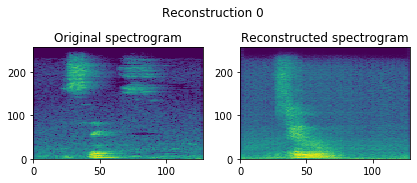

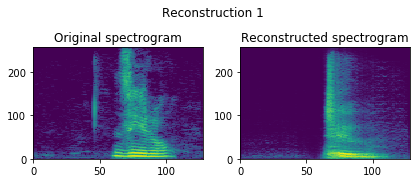

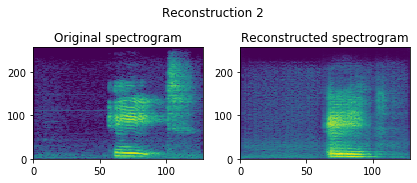

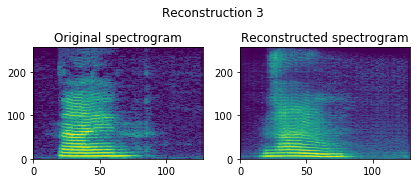

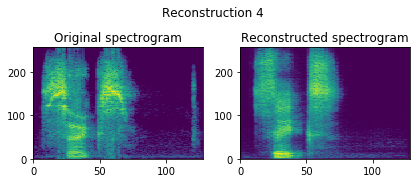

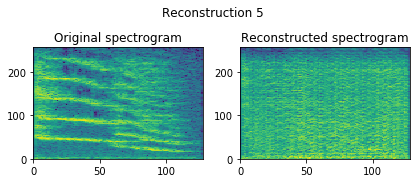

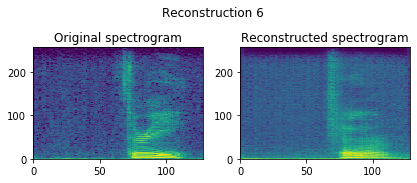

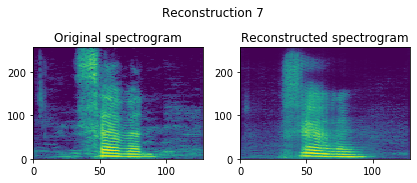

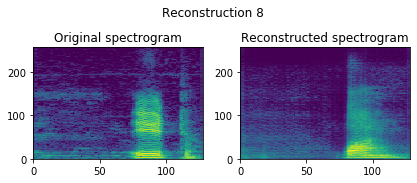

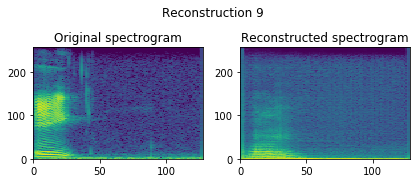

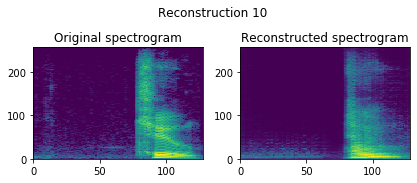

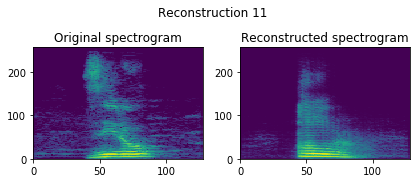

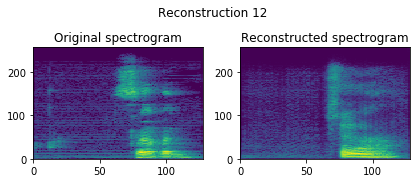

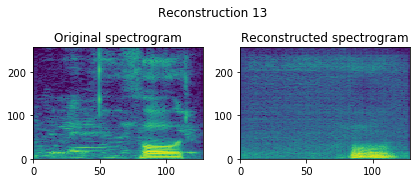

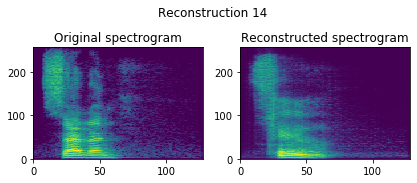

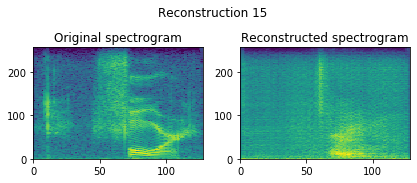

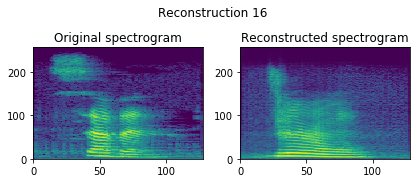

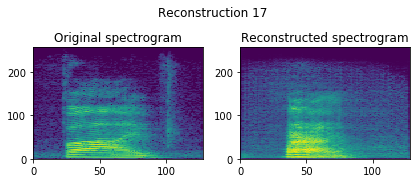

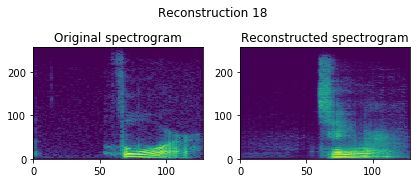

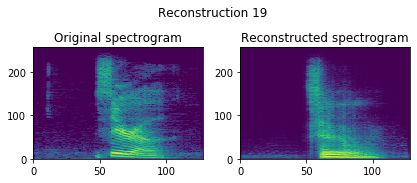

In [17]:
for i in range(len(X_ts)):
    x = X_ts[i][:, :, 0]
    x_recon = X_ts_recon[i][:, :, 0]
    
    plt.suptitle("Reconstruction {}".format(i), y=1.05)
    plt.subplot(221)
    plt.title("Original spectrogram")
    plt.pcolormesh(x)
    plt.subplot(222)
    plt.title("Reconstructed spectrogram")
    plt.pcolormesh(x_recon)
    plt.tight_layout()
    plt.show()

### Play reconstructed audio for training set

In [18]:
for i in range(len(X_tr)):
    x = X_tr[np.newaxis, i]
    x_recon = X_tr_recon[np.newaxis, i]
    try:
        x_audio = inverse_preprocessing(x, fft_hop_size=FFT_HOP_SIZE, fft_window_length=FFT_WINDOW_LEN, fixed_audio_len=FIXED_AUDIO_LEN)
        x_recon_audio = inverse_preprocessing(x_recon, fft_hop_size=FFT_HOP_SIZE, fft_window_length=FFT_WINDOW_LEN, fixed_audio_len=FIXED_AUDIO_LEN)
        print("Original sample {}".format(i))
        display(ipd.Audio(x_audio, rate=16000))
        print("Reconstructed sample {}".format(i))
        display(ipd.Audio(x_recon_audio, rate=16000))
    except Exception as e:
        print("Exception: {}".format(str(e)))

  0%|          | 0/1 [00:00<?, ?it/s]/home/c-matsty/Bi-TiFGAN---TensorFlow-1.14/src/sample_generation/generate.py:100: RuntimeWarning: divide by zero encountered in log
  logMagSpectrogram = np.log(magSpectrogram.astype(np.float64))
100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


### Play reconstructed audio for test set

In [19]:
for i in range(len(X_ts)):
    x = X_ts[np.newaxis, i]
    x_recon = X_ts_recon[np.newaxis, i]
    try:
        x_audio = inverse_preprocessing(x, fft_hop_size=FFT_HOP_SIZE, fft_window_length=FFT_WINDOW_LEN, fixed_audio_len=FIXED_AUDIO_LEN)
        x_recon_audio = inverse_preprocessing(x_recon, fft_hop_size=FFT_HOP_SIZE, fft_window_length=FFT_WINDOW_LEN, fixed_audio_len=FIXED_AUDIO_LEN)
        print("Original sample {}".format(i))
        display(ipd.Audio(x_audio, rate=16000))
        print("Reconstructed sample {}".format(i))
        display(ipd.Audio(x_recon_audio, rate=16000))
    except Exception as e:
        print("Exception: {}".format(str(e)))

100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


## Reconstruct a number of latent samples

In [20]:
# Number of latent samples to reconstruct
latent_no = 30
nlatent = 100

In [21]:
Z = np.random.normal(loc=0.0, scale=1.0, size=[latent_no, nlatent])

In [22]:
Z_recon = get_posthoc_encoder_latent_reconstructions(Z, tifgan_checkpoint_path, tifgan_checkpoint_step,
                                                    encoder_checkpoint_path, name)

100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


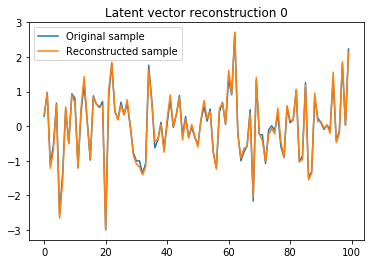

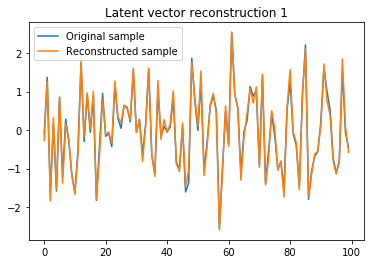

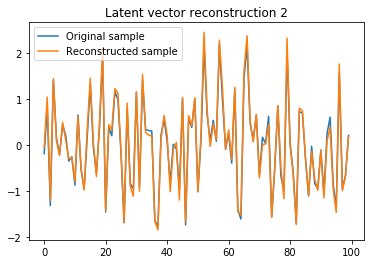

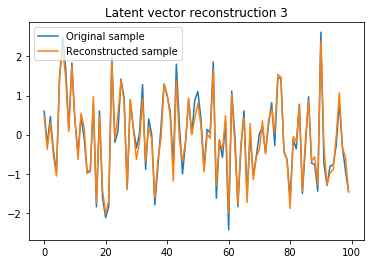

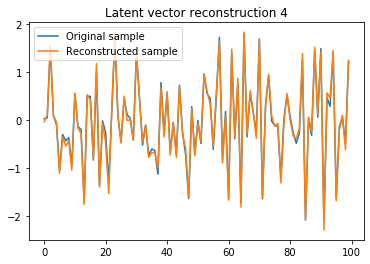

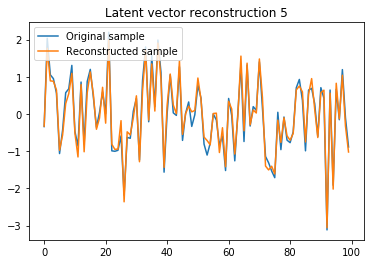

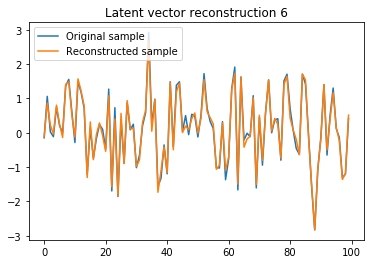

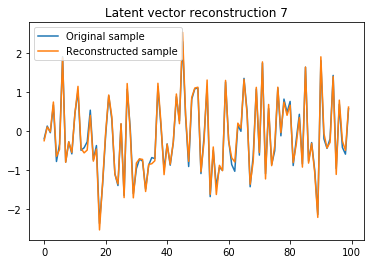

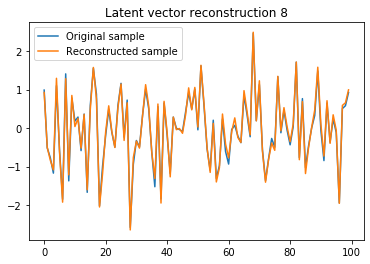

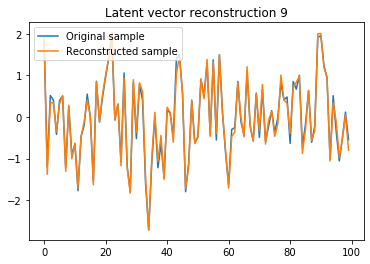

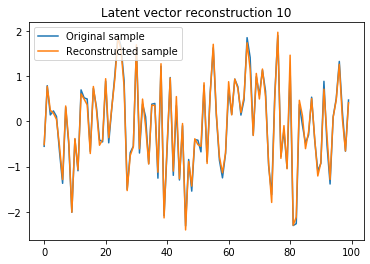

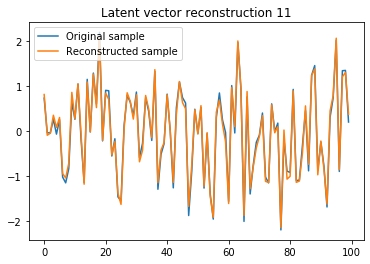

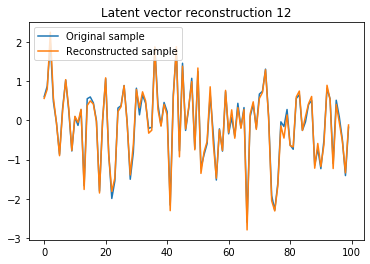

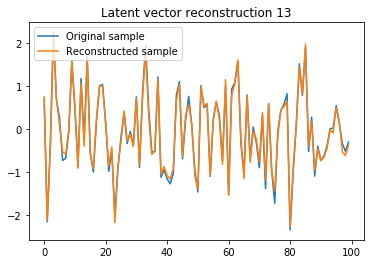

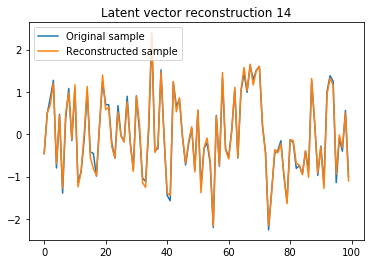

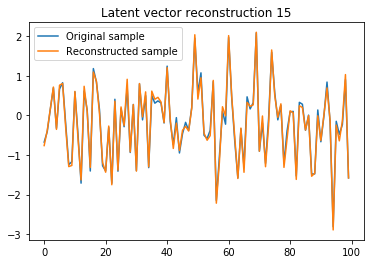

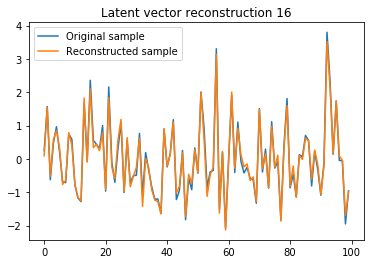

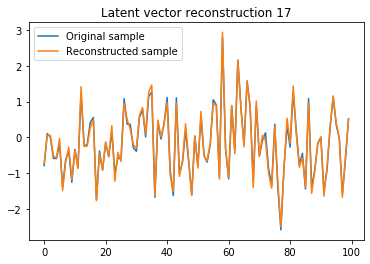

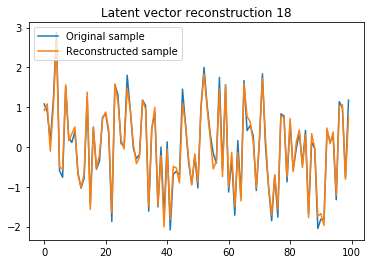

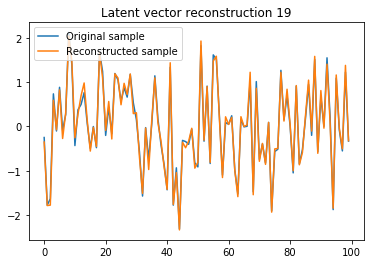

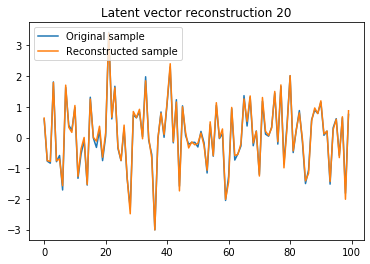

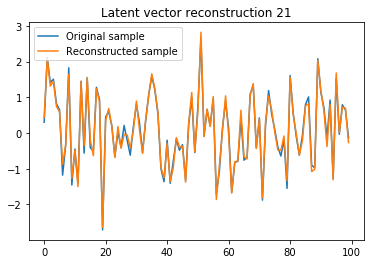

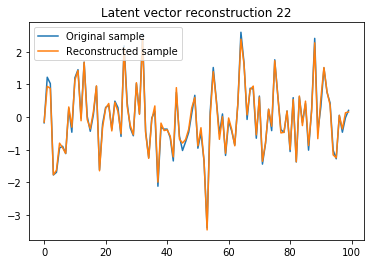

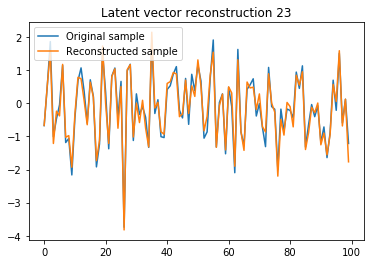

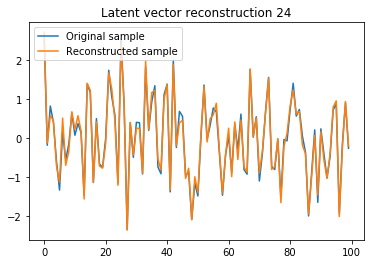

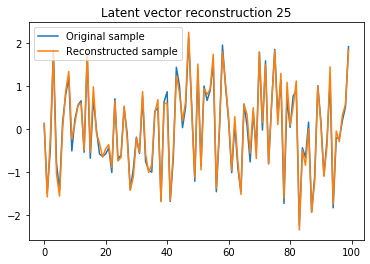

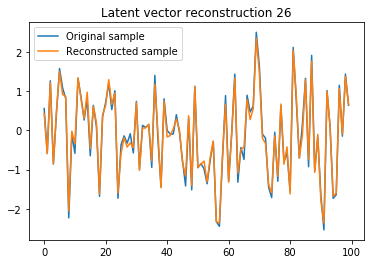

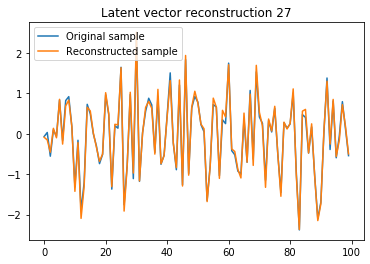

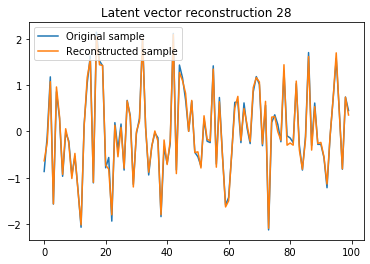

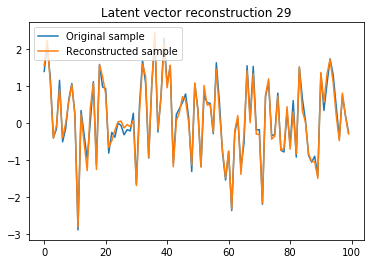

In [34]:
for i in range(len(Z)):
    z = Z[i]
    z_recon = Z_recon[i]
    
    plt.title("Latent vector reconstruction {}".format(str(i)))
    plt.plot(z, label="Original sample")
    plt.plot(z_recon, label="Reconstructed sample")
    plt.legend(loc='upper left')
    plt.show()